In [1]:
import cartopy.feature as cfeature ## for lakes/borders et
countries_50m = cfeature.NaturalEarthFeature('cultural','admin_0_countries','50m',edgecolor='k',facecolor='none')
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset  
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

(1, 1, 256, 512) u_slice
[0.00014579360140487552 0.0001457662438042462 0.00014571702922694385
 0.0001456459576729685 0.00014555304369423538 0.00014543828729074448
 0.0001453017321182415 0.00014514336362481117 0.00014496324001811445
 0.00014476136129815131 0.00014453775656875223 0.0001442924840375781
 0.00014402555825654417 0.00014373702288139611 0.00014342692156787962
 0.00014309532707557082 0.00014274225395638496 0.00014236777496989816
 0.0001419719192199409 0.000141554803121835 0.00014111641212366521
 0.00014065687719266862 0.00014017622743267566 0.0001396745501551777
 0.00013915194722358137 0.0001386084477417171 0.0001380441535729915
 0.00013745915202889591 0.00013685354497283697 0.0001362274051643908
 0.00013558081991504878 0.0001349138910882175 0.00013422673509921879
 0.00013351943925954401 0.000132792119984515 0.00013204487913753837
 0.0001312778185820207 0.00013049106928519905 0.00012968474766239524
 0.00012885899923276156 0.00012801389675587416 0.00012714957119897008
 0.0001262

C:\Users\jpwes\anaconda3\envs\dataprocessing\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\jpwes\anaconda3\envs\dataprocessing\lib\site-packages\cartopy\mpl\gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


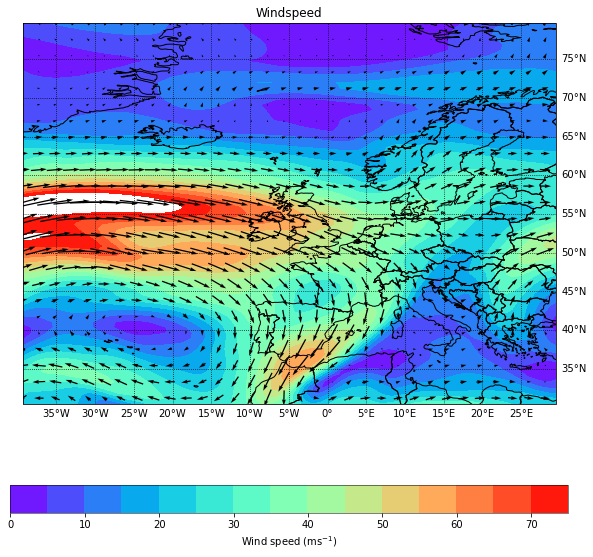

plotted windspeed now onto cross-section
-9.84375 nearest value
[42] lon_slice_index


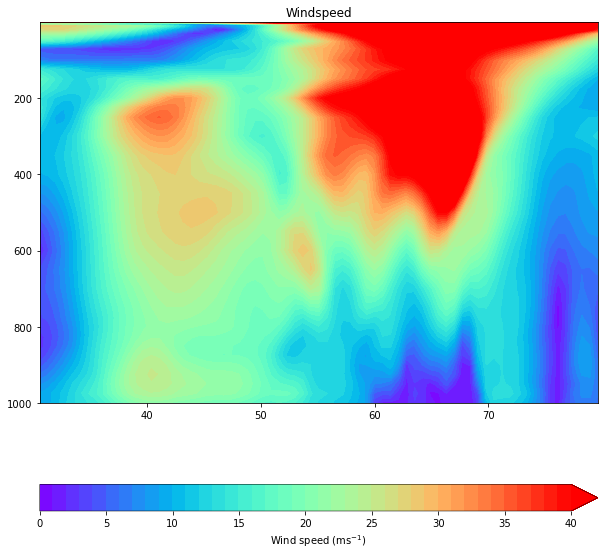

plotted  windspeed cross section now to plot relative vorticity


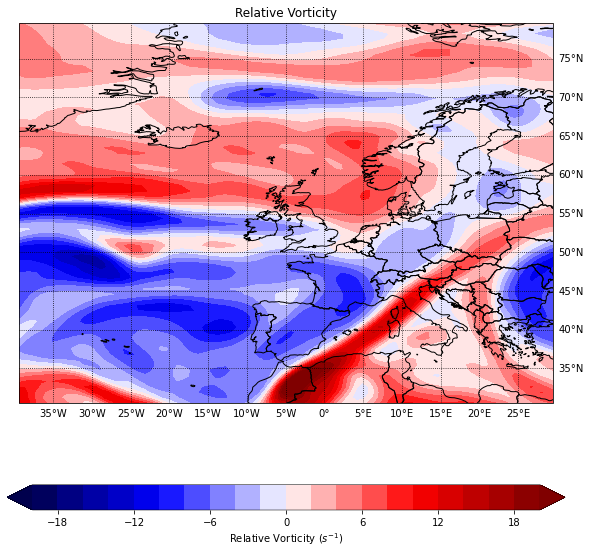

plotted relative vorticity now to plot vertical velocity


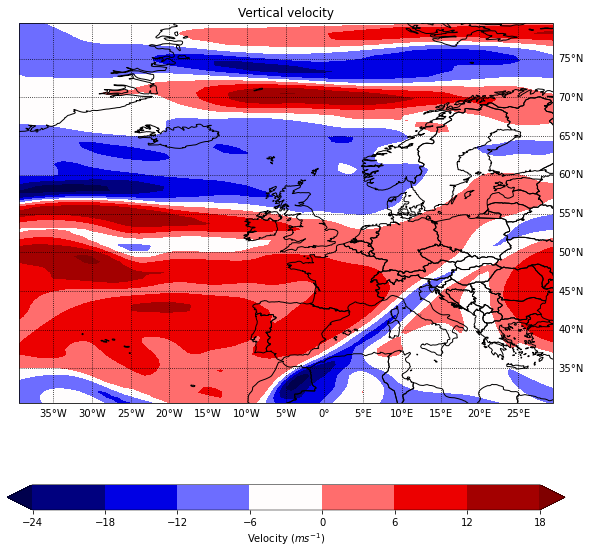

In [2]:
# In[]: Specify the path out for all figures that will be saved i.e. the path to your directory on linux or the directory you wish to 
# save the figures
#pathout ="/nfs/see-fs-02_users/username/SOEEmodule"


# Specify the year, month, hours and days for which you wish to plot data for
year = "2011"

mon= "12"

# if you want to output files for all times and all days then take the # away from the below two lines. 
#hours = ["00","06","12","18"] 
#days = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']

# Just want to output for one time and day...then use e.g.:
hours = ["12"]
days = ["03"]

# Loop over all years, months, days and hours specified above to load in the data and then plot horizontal windspeed
# vertical cross-sections of windspeed, calculate relative vorticity and plot relative vorticity. 
for d in days:
    for time in hours: 
        erai_data = Dataset('data/ggap201112031200.nc') #'/nfs/a321/datasets/ERA-interim/'+str(year)+'/ap/ggap' + str(year)+''+str(mon)+''+str(d)+''+str(time)+'00.nc','r')
       
        
        
        # In[]: Extracting the relevant data from the ERA-interim files loaded

        
        lat = erai_data.variables['latitude'][:] #latitudes
        
        lon = erai_data.variables['longitude'][:] #longitudes
        
        
        p   = erai_data.variables['p'][:] #pressure
        t   = erai_data.variables['t'][:] #time
        
        u   = erai_data.variables['U'][:] #u winds
        v   = erai_data.variables['V'][:] #v winds
        T   = erai_data.variables['T'][:] #temperature?
 
        erai_data.close()
        
        
        # In[]: Longitude values are loaded in as 0 to 360 degrees. Modify so 
        # that they go -180 to 180 degrees as easier to find subsections this way. 
        lon = ((lon - 180) % 360) - 180
        indcs = np.argsort(lon)
        
        #Make the lon, u and v arrays know that they too need to have their longitudes between -180 to 180 degrees 
        # instread of 0 to 360 degrees. We don't need to do this for p as it is just a 1D array
        u = u[:,:,:,indcs]
        v = v[:,:,:,indcs]
        T = T[:,:,:,indcs]
        
        lon = lon[indcs]
      
 
        
        # In[]: 
        #define the pressure level you wish to use to plot the horizontal windspeed and relative vorticity plots
        p_lev = 250 # this indicates 200hPa level
        p_level = str(p_lev) # this is used to label the figures which are saved at the end
        
        # Find at which index in the array for pressure the p_lev specified is located
        pressure = np.where(p==p_lev) 
        
        # Take time/pressure slice of U and V
        u_slice = u[0,pressure,:,:]
        v_slice = v[0,pressure,:,:]
        T_slice = T[0,pressure,:,:]
        print (u_slice.shape, 'u_slice')
        
        #Make arrays 2D so now just an array of u and v winds for pressure level p_lev at all latitude and longitudes
        u_slice = u_slice[0,0,:,:]
        v_slice=v_slice[0,0,:,:]
        T_slice =T_slice[0,0,:,:]

        
       
        # In[]: Calculate windspeed for one pressure level specified above
        wspeed=np.sqrt((u_slice**2)+(v_slice**2))

        #Calculate windspeed for all pressure levels
        
        wspeed_all = np.sqrt((u**2)+(v**2))
        wspeed_all= wspeed_all[0,:,:,:]
        
        # In[]: Coriolis force calculation
        
        earthrot = 7.29*10**-5
        pi       = 3.14159
    

        Coriolis = 2*earthrot*np.sin(lat*pi/180)
        print(Coriolis, 'Coriolis')
             
        
        
        # In[42]: Calculate relative vorticity
       
        # Define haversine formula to convert lon/lat (degrees) to metres
        
        
        
        def haversine( lon1, lat1, lon2, lat2):
            R = 6371e3 # metres
            phi1 = math.radians(lat1)
            phi2 = math.radians(lat2)
            dphi = phi2-phi1
            
            lambda1 = math.radians(lon1)
            lambda2 = math.radians(lon2)
            dlambda = lambda2-lambda1
        
            a = math.sin(dphi/2) * math.sin(dphi/2) + math.cos(phi1) * math.cos(phi1) * math.sin(dlambda/2) * math.sin(dlambda/2)
            c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        
            d = R * c
            
            return d
        
        # ### Calculate dx,dy across points
        # 
        
        # Create empty arrays for dx and dy 
        
        
        dx_array = np.empty( u_slice.shape)# 
        print(dx_array.shape, 'dx_array shape')
        dy_array = np.empty( u_slice.shape)# 
        
             
        for i in range( 0, lat.size):
            for j in range( 0, lon.size):
                
                # Find index +/- 1, remembering that we need to wrap around the earth at
                # the extent of the coordinates
                
                low_index = j-1
                high_index = j+1
                
                if high_index == lon.size:
                    high_index = -1
                
                dx_array[i,j] = haversine( lon[low_index], lat[i], lon[high_index], lat[i]) 
                
        
                
        for j in range( 0, lon.size):
            for i in range( 0, lat.size):
                
                # Find index +/- 1, remembering that we need to wrap around the earth at
                # the extent of the coordinates
                
                low_index = i-1
                high_index = i+1
                
                if high_index == lat.size:
                    high_index -= 1
                    dy_array[i,j] = haversine( lon[j], lat[low_index], lon[j], lat[high_index]) 
                elif low_index == -1:
                    low_index=0
                    dy_array[i,j] = haversine( lon[j], lat[low_index], lon[j], lat[high_index]) 
                    
                else:
                    dy_array[i,j] = haversine( lon[j], lat[low_index], lon[j], lat[high_index]) 
        
      
        
     
        
        
        # Find du and dv
        # As above, we need to find du and dv using centred difference
        
        # Define an empty array to put the calculations of du an dv into
        
        
        du_array = np.empty( u_slice.shape)
        dv_array = np.empty( u_slice.shape)
        
        
        # In[124]: Check the shape of u_slice to check it worked
        
        
        u_slice.shape
        
        
        # Calculate the central finite difference for dv
        #(U(i+1) + u(i-1))/2*dx  central differening
        
        for i in range( 0, lat.size):
             for j in range( 0, lon.size):
                
                # Find index +/- 1, remembering that we need to wrap around the earth at
                # the extent of the coordinates
                
                low_index = j-1
                high_index = j+1
                
                if high_index == lon.size:
                    high_index = -1
                
                dv_array[i,j] = (v_slice[ i, high_index] - v_slice[ i, low_index])

        
        
        # In[128]: Calculate the central finite difference for du
        
        for j in range( 0, lon.size):
            for i in range( 0, lat.size):
            
            # Find index +/- 1, remembering that we need to wrap around the earth at
            # the extent of the coordinates
            
                low_index = i-1
                high_index = i+1
                
                if high_index == lat.size:
                    high_index -= 1
                    #du_array[i,j] = (u_slice[ high_index, j] - u_slice[ low_index, j])
                elif low_index==-1:
                    low_index=0
                    #du_array[i,j] = (u_slice[ high_index, j] - u_slice[ low_index, j])
                else:
                    du_array[i,j] = (u_slice[ high_index, j] - u_slice[ low_index, j]) 
            
            
        
        
        # In[]: Calculate relative vorticity
        
        #The the haversine formula is always a positive distance so we need to do dv/dx + du/dy 
        #to calculate relative vorticity instead of dv/dx - du/dy as is the usual equation
        
        vort = dv_array / dx_array + du_array / dy_array   
        
        # Change the units of vorticity 
        vorticity = vort *100000 
        vertical_velocity = -(du_array/dx_array + dv_array/dy_array)*100000 
        
        print("now onto producing the plots!!!!!")
        
        # In[] : Specify the subsection of the Global domain which you wish to plot: latitude and longitude required.
        # If you wish to plot for the whole Globe then comment this section out using #
        
        #Specify min and max values of latitude and longitude 
        lat_min = 30
        lat_max =80
        lon_min = -40
        lon_max = 30
        
        # Find where in the longitude array the values are between lon_min and lon_max 
        lons = np.where((lon >= lon_min) & (lon <= lon_max))[0]
        
        # Gives an array which is the subdomain of the longitude values 
        lon_subset = lon[lons]
        
        #Find the values in the longitude array at which this subsection range of longitudes lies between
        lon_min_index = np.min(lons)  
        lon_max_index = np.max(lons) + 1
        print(lon_subset, 'lon_subet')
        #Repeat for latitude
        lats = np.where((lat >= lat_min) & (lat <= lat_max))[0]
        lat_subset = lat[lats]
        lat_min_index =np.min(lats) 
        lat_max_index = np.max(lats) +1
        print(lat_subset ,'lat_subset')
        
        # Find the values of u and v for just the subdomain (and still only for one pressure level)
        u_subset=  u_slice[lat_min_index:lat_max_index,lon_min_index:lon_max_index]
        v_subset = v_slice[lat_min_index:lat_max_index,lon_min_index:lon_max_index]

        # In[]: Plot the windspeed with windbarbs to indicate wind direction

        #Specify manually the contour levels that will be plotted
        wlevels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
        
        #Plot the windspeed
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection=ccrs.PlateCarree())
        plt.contourf(lon_subset, lat_subset, wspeed[lat_min_index:lat_max_index,lon_min_index:lon_max_index], levels=wlevels, transform=ccrs.PlateCarree(),cmap=plt.cm.rainbow)
        #Produce wind barbs
        widths = np.linspace(0, 2, lats.size)
        crs = ccrs.PlateCarree()
        transform = crs
        ax.quiver(lon_subset[::3], lat_subset[::3], u_subset[::3,::3], v_subset[::3,::3], transform=crs, pivot='middle', linewidths=widths)
        # Plot a colourbar and label 
        cbar = plt.colorbar(orientation='horizontal')
        cbar.outline.set_linewidth(0.5)
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Wind speed (ms$^{-1}$)')
        #Add lines for countries 
        ax.add_feature(countries_50m, linewidth=1)
        #Add latitude and longitude grid
        gl = ax.gridlines(color="black", linestyle="dotted",draw_labels='True')
        # This specifies that you only want to label the lat and long values at the bottom and to the left of the figure
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylines = True
        # Manually specify where you want the tick marks and thus labels for latitude and longitude to be: is the same as the subdomain specified above
        gl.xlocator = mticker.FixedLocator([-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30])
        gl.ylocator = mticker.FixedLocator([30,35,40,45,50,55,60,65,70,75,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
     
        plt.title("Windspeed")
        #Save the figures for all dates and times input at the start
        plt.savefig('ERA_interim_Windspeed_'+str(year)+''+str(mon)+''+str(d)+'_'+str(time)+'00_'+str(p_level)+'hPa.png',format ='png', dpi=150, bbox_inches='tight')
        plt.show()

        
        print ('plotted windspeed now onto cross-section')
        
        # In[]: Find the longitude value through which you wish to plot a vertical cross-section#
        #Function the nearest longitude from the ERA data to the longitude that you want to plot
        def find_nearest(array, value):
            array = np.asarray(array)
            idx = (np.abs(array - value)).argmin()
            return array[idx]
        #Specify the longitude value you wish to plot a cross-section through
        lon_cross_section = -10
        #Find the nearest longitude value to lon_cross_section value that is contained in the ERA-interim longitude values
        nearest = find_nearest(lon_subset,lon_cross_section)
        print(nearest , 'nearest value')
        #Find the number within the longitude array at which the longitude you wish to plot a cross-section through is located
        lon_slice_index = np.where(lon_subset == nearest)[0]
        print (lon_slice_index, 'lon_slice_index')
        
        
        #Create an array of windspeeds for all pressure levels, through the sub-section range of latitudes and 
        #through the longitude value just determined above
        windspeed_vert = wspeed_all[:,lat_min_index:lat_max_index,lon_slice_index]
        
        # In[]: Plot vertical cross-section for windspeed
        
        #Create the contour levels that will be used when plotting: this creates 41 equally spaced contour levels between 0 and 40
        clevels=np.linspace(0,40,num=41)
        
        #Plot the vertical cross-section
        fig = plt.figure(figsize=(10,10))
        plt.gca().invert_yaxis()
        plt.contourf(lat_subset, p, windspeed_vert[:,:,0], levels=clevels, cmap=plt.cm.rainbow,extend='max')
        cbar = plt.colorbar(orientation='horizontal')
        cbar.outline.set_linewidth(0.5)
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Wind speed (ms$^{-1}$)')
        plt.title("Windspeed")
        #save the figures for all dates and times 
        plt.savefig('ERA_interim_Windspeed_Cross_Section'+str(year)+''+str(mon)+''+str(d)+'_'+str(time)+'00_Longitude_'+str(lon_cross_section)+'.png',format ='png', dpi=150, bbox_inches='tight')
        plt.show()

        
        print('plotted  windspeed cross section now to plot relative vorticity')
        
        # In[]: Plot the relative vorticity
        
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection=ccrs.PlateCarree())
        clevels = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
        plt.contourf(lon_subset, lat_subset, vorticity[lat_min_index:lat_max_index, lon_min_index:lon_max_index], levels=clevels, transform=ccrs.PlateCarree(),cmap='seismic',extend='both')
        cbar = plt.colorbar(orientation='horizontal')
        cbar.outline.set_linewidth(0.5)
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Relative Vorticity ($s^{-1}$)')
        ax.add_feature(countries_50m, linewidth=1)
        gl = ax.gridlines(color="black", linestyle="dotted",draw_labels='True')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylines = True
        gl.xlocator = mticker.FixedLocator([-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30])
        gl.ylocator = mticker.FixedLocator([30,35,40,45,50,55,60,65,70,75,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        #Save and show the figure
        plt.title("Relative Vorticity")
        plt.savefig('ERA_interim_Relative_vorticity_'+str(year)+''+str(mon)+''+str(d)+'_'+str(time)+'00_'+str(p_level)+'hPa.png',format ='png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print('plotted relative vorticity now to plot vertical velocity')
        
        # In[]: Plot the relative vorticity
        
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection=ccrs.PlateCarree())
        #clevels = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
        plt.contourf(lon_subset, lat_subset, vertical_velocity[lat_min_index:lat_max_index, lon_min_index:lon_max_index], transform=ccrs.PlateCarree(),cmap='seismic',extend='both')
        cbar = plt.colorbar(orientation='horizontal')
        cbar.outline.set_linewidth(0.5)
        cbar.ax.tick_params(labelsize=10)
        cbar.set_label('Velocity ($ms^{-1}$)')
        ax.add_feature(countries_50m, linewidth=1)
        gl = ax.gridlines(color="black", linestyle="dotted",draw_labels='True')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylines = True
        gl.xlocator = mticker.FixedLocator([-40,-35,-30,-25,-20,-15,-10,-5, 0,5,10,15,20,25,30])
        gl.ylocator = mticker.FixedLocator([30,35,40,45,50,55,60,65,70,75,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        #Save and show the figure
        plt.title("Vertical velocity")
        plt.savefig('ERA_interim_Vertical_velocity'+str(year)+''+str(mon)+''+str(d)+'_'+str(time)+'00_'+str(p_level)+'hPa.png',format ='png', dpi=150, bbox_inches='tight')
        plt.show()